In [1]:
import numpy as np

In [2]:
omega = np.exp(2*np.pi*1.j/3)
Z = [[1, 0, 0, 0], [0, omega, 0, 0], [0, 0, omega*omega, 0], [0, 0, 0, 1]]
X = [[0,0,1,0], [1,0,0,0], [0,1,0,0],[0,0,0,1]]
I = np.identity(4)

In [3]:
from qiskit.synthesis import TwoQubitWeylDecomposition

In [4]:
weylDecomCirc = TwoQubitWeylDecomposition(Z)
Zgatequtryt = weylDecomCirc.circuit()

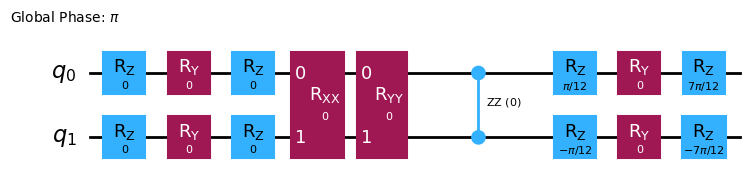

In [6]:
Zgatequtryt.draw('mpl')

In [7]:
from qiskit.quantum_info import Statevector

In [8]:
Statevector(Zgatequtryt).draw('latex')

<IPython.core.display.Latex object>

In [9]:
from qiskit.circuit import QuantumCircuit

In [16]:
testCirc = QuantumCircuit(2)

testCirc.rz(np.pi/12, 0)
testCirc.rz(7*np.pi/12, 0)

testCirc.rz(-np.pi/12, 1)
testCirc.rz(-7*np.pi/12, 1)


testCirc.name = "Zqutrit"

In [17]:
Statevector(testCirc).draw('latex')

<IPython.core.display.Latex object>

In [14]:
from qiskit import qpy

In [18]:
with open('Zgate.qpy', 'wb') as fd:
    qpy.dump(testCirc, fd)

In [21]:
with open('Zgate.qpy', 'rb') as fd:
    ztest = qpy.load(fd)[0]

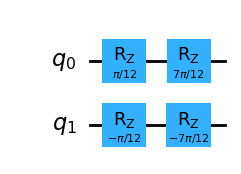

In [22]:
ztest.draw('mpl')

In [23]:
weylDecomCircX = TwoQubitWeylDecomposition(X)
Xgatequtryt = weylDecomCircX.circuit()

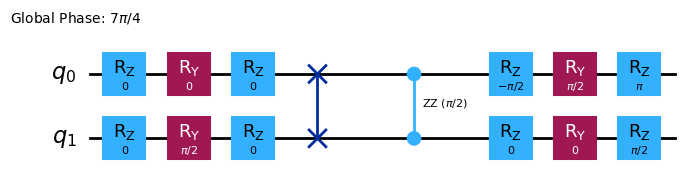

In [24]:
Xgatequtryt.draw('mpl')

In [31]:
Statevector(Xgatequtryt).draw('latex')

<IPython.core.display.Latex object>

In [49]:
xtestCirc = QuantumCircuit(2)

xtestCirc.ry(np.pi/2, 1)

xtestCirc.swap(0,1)
xtestCirc.rzz(np.pi/2, 0, 1)
xtestCirc.rz(-np.pi/2, 0)
xtestCirc.ry(np.pi/2, 0)
xtestCirc.rz(np.pi, 0)

xtestCirc.rz(np.pi/2, 1)

xtestCirc.global_phase = 7*np.pi/4
xtestCirc.name = "Xqutrit"

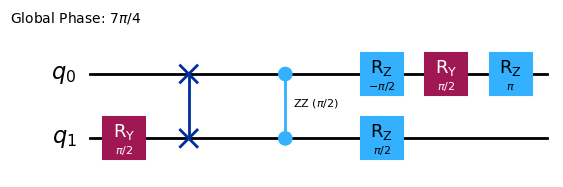

In [50]:
xtestCirc.draw('mpl')

In [51]:
Statevector(xtestCirc).draw('latex')

<IPython.core.display.Latex object>

In [52]:
testCirc = QuantumCircuit(4)

testCirc.append(ztest, [0,1])
testCirc.append(xtestCirc, [0,1])

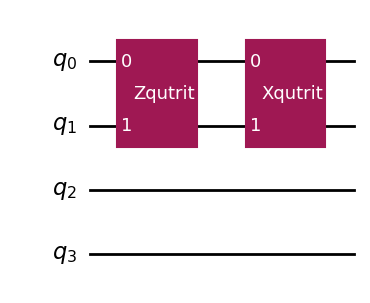

In [53]:
testCirc.draw('mpl')

In [54]:
with open('Xgate.qpy', 'wb') as fd:
    qpy.dump(xtestCirc, fd)